# Data Visualization Midterm
## Varun Pandey

This dataset was downloaded from Kaggle and contains survey data from participants on their opinions of the popular film franchise, Star Wars. It contains data on if an individual has seen Star Wars, if so, what movie is their favorite and also contains demographic data that includes age, gender, and household income. The goal of this analysis is to analyze public opinions about the Star Wars film franchise using the survey data. 

For reference in this dataset, the Star Wars films are listed in order. Episode 1: The Phantom Menace, Episode 2: Attack of the Clones, Episode 3: Revenge of the Sith, Episode 4: A New Hope, Episode 5: The Empire Strikes Back, Episode 6: The Return of the Jedi.

I would like to answer the following questions:
Which Star Wars films are most and least popular among surveyors?
How do preferences differ by gender or age groups?
Which characters are viewed most favorably?
Is there any relationship between Star Wars and Star Trek fandom?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("star_wars.csv")
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
print(df.isnull().sum().sum())

13455


In [6]:
df = df.dropna()
print(df.isnull().sum().sum())

0


I wanted to drop all the null values off the dataset so I did the dropna() above.

In [7]:
df = df.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'Episode 1',
    'Unnamed: 4': 'Episode 2',
    'Unnamed: 5': 'Episode 3',
    'Unnamed: 6': 'Episode 4',
    'Unnamed: 7': 'Episode 5',
    'Unnamed: 8': 'Episode 6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'Episode 1 Ranking',
    'Unnamed: 10': 'Episode 2 Ranking',
    'Unnamed: 11': 'Episode 3 Ranking',
    'Unnamed: 12': 'Episode 4 Ranking',
    'Unnamed: 13': 'Episode 5 Ranking',
    'Unnamed: 14': 'Episode 6 Ranking'
})
df.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Episode 1,Episode 2,Episode 3,Episode 4,Episode 5,Episode 6,Episode 1 Ranking,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
16,3.292583e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Somewhat favorably,Han,Yes,Yes,Yes,Male,18-29,"$0 - $24,999",Some college or Associate degree,West South Central
23,3.292512e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Greedo,Yes,Yes,Yes,Male,18-29,"$50,000 - $99,999",Bachelor degree,South Atlantic
27,3.292420e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,South Atlantic


Here, I wanted to rename all of the unnamed movie names to the episode number so it would be easier to visualize when creating plots. 

In [8]:
seen_movies = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6']
rank_movies = ['Episode 1 Ranking', 'Episode 2 Ranking', 'Episode 3 Ranking', 'Episode 4 Ranking', 'Episode 5 Ranking', 'Episode 6 Ranking']

seen_df = df[seen_movies]
rank_df = df[rank_movies]

In [9]:
seen_df.head()

,Episode 1,Episode 2,Episode 3,Episode 4,Episode 5,Episode 6
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
6,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
16,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
23,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
27,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [10]:
rank_df.head()

,Episode 1 Ranking,Episode 2 Ranking,Episode 3 Ranking,Episode 4 Ranking,Episode 5 Ranking,Episode 6 Ranking
5,5,4,6,2,1,3
6,1,4,3,6,5,2
16,4,6,5,3,1,2
23,6,5,4,3,1,2
27,4,6,5,2,3,1


In [11]:
for col in rank_movies:
    df[col] = pd.to_numeric(df[col], errors='coerce')

rank_df = df[rank_movies]

avg_ranks = rank_df.mean()

Here I needed to change the ranked_movies to numeric because they were in strings earlier. Then I also found the average of the ranks so that it would be easier to plot later.

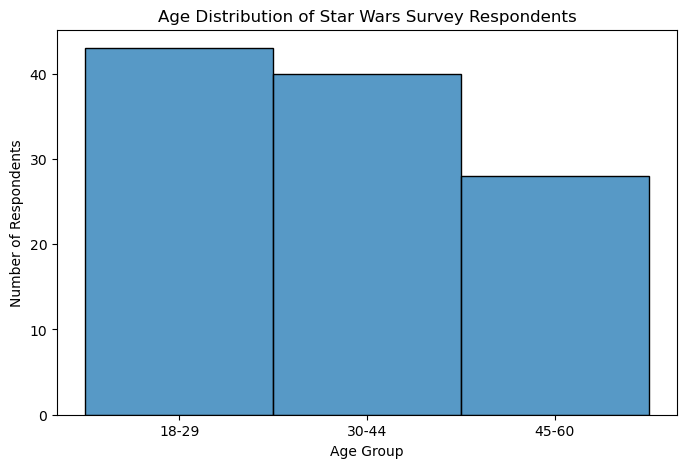

In [12]:
age_order = ['18-29', '30-44', '45-60', '>60']

df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', bins=10, kde=False)
plt.title("Age Distribution of Star Wars Survey Respondents")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.show()

This first chart shows the age distribution of the survey respondents. Over 40 of them were younger and between 18-29 and then 30-44 made up a sizable amount of people. 45-60 finally, was the lowest of the age groups. 

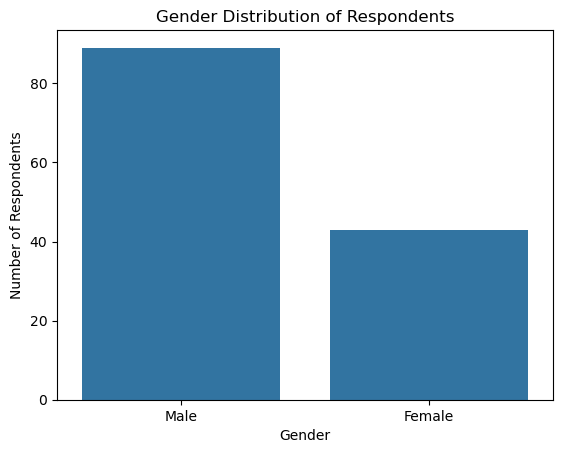

In [13]:
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution of Respondents")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.show()

I then moved on to understand the gender distribution of the surveyors which revealed that the majority of people who answered were male with over 80 males answering and females only making up about 40. This shows that the majority of the surveyors were males in this dataset. 

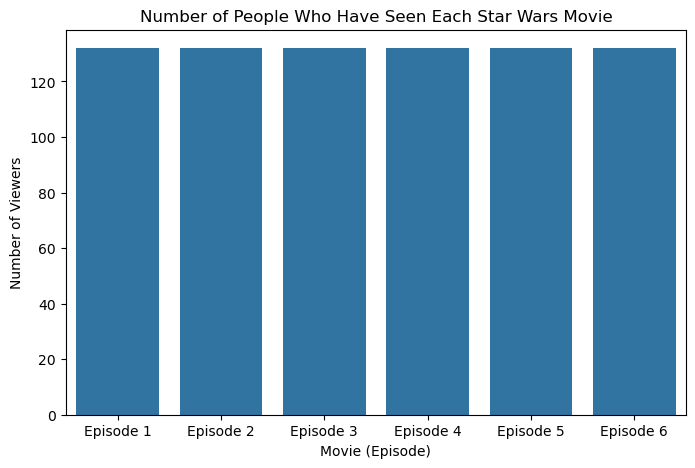

In [14]:
seen_counts = seen_df.notnull().sum()

plt.figure(figsize=(8,5))
sns.barplot(x=seen_counts.index, y=seen_counts.values)
plt.title("Number of People Who Have Seen Each Star Wars Movie")
plt.xlabel("Movie (Episode)")
plt.ylabel("Number of Viewers")
plt.show()

This graph was made to show how many people have seen each movie. But I did realize that in the dataset, the surveyors have to have seen every single star wars movie if they are to rank them 1-6. So it shows that over 120 people have seen the movies since if they answered yes to watching a movie, they have to see every single movie to be able to rank which is why they are all the same. 

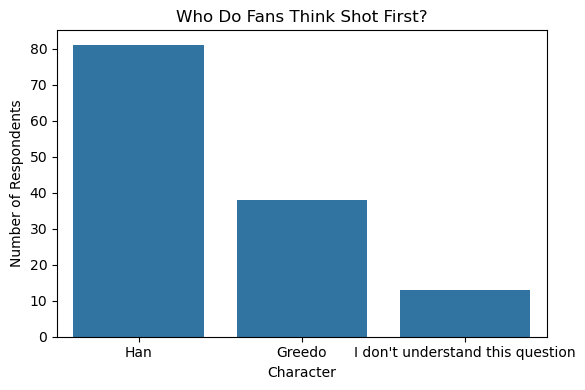

In [28]:
shot_counts = df['Which character shot first?'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=shot_counts.index, y=shot_counts.values)

plt.title("Who Do Fans Think Shot First?")
plt.xlabel("Character")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()

This graph is interesting because it is something only real Star Wars fans can understand. For reference, there is a scene in Episode 4: A New Hope where Han Solo and another character called Greedo are sitting at a table. It has been a heated debate over the last decades on who shoots first when Han Solo kills Greedo. This plot shows that the majority of fans believe that Han Solo shoots first between the two and about a little less than 40 believe Greedo shot first. Many die hard fans would know about this scene and have a preference between the two characters. Those who answered that they didn't understand probably aren't diehard fans or just don't remember the scene.

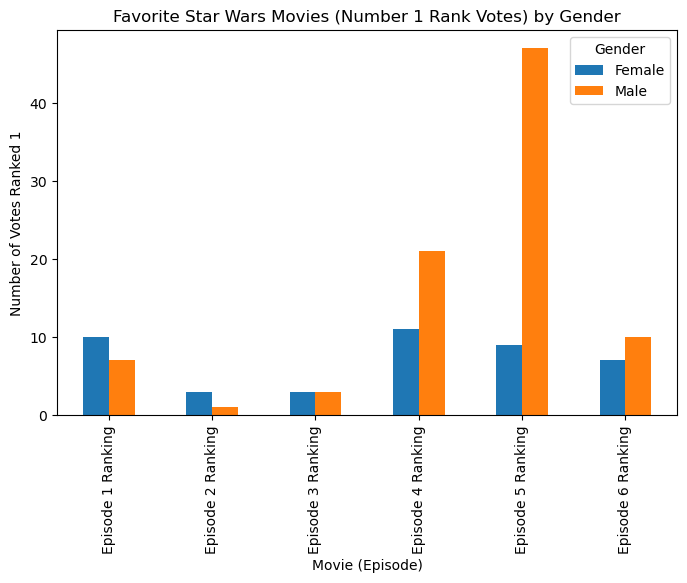

In [16]:
fav_df = df.groupby('Gender')[rank_movies].apply(lambda x: (x == 1).sum())
fav_df = fav_df.T 
# I had to ask chatgpt how to do this part earlier.

fav_df.plot(kind='bar', figsize=(8,5))
plt.title("Favorite Star Wars Movies (Number 1 Rank Votes) by Gender")
plt.xlabel("Movie (Episode)")
plt.ylabel("Number of Votes Ranked 1")
plt.show()

Looking at gender earlier, I wanted to see the gender distribution when voting for each movie. This plot shows which movie people ranked as their best or number 1 movie out of the 6. It shows that Episode 5: The Empire Strikes Back is still the highest by a large amount. It is majority male dominated with over 40 males voting for it as their best movie. The highest female rated movie was Episode 4: A New Hope which had just over 10 votes. 

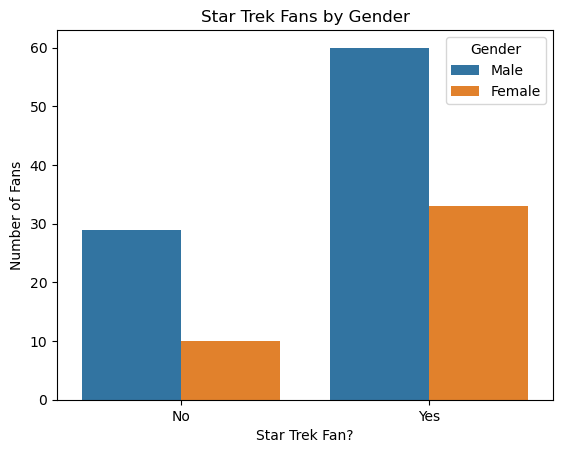

In [21]:
sns.countplot(data=df, 
              x='Do you consider yourself to be a fan of the Star Trek franchise?', 
              hue='Gender')
plt.title("Star Trek Fans by Gender")
plt.xlabel("Star Trek Fan?")
plt.ylabel("Number of Fans")
plt.show()

The dataset included a category which asked if a person was a fan of a similar franchise called Star Trek. It is what Star Wars used to be compared with in terms of how big of a franchise it was. Star Wars ended up being one of the biggest film franchises leaving Star Trek in the dust. This plot asks if some of the respondents were Star Trek fans. This could also play into why some people aren't Star Wars fans because they prefer Star Trek and vice versa with people not liking Star Trek but Star Wars instead. This shows the gender distribution of the category which shows that about 60 males and over 30 females are Star Trek fans while about 30 males and about 10 females do not like Star Trek. 

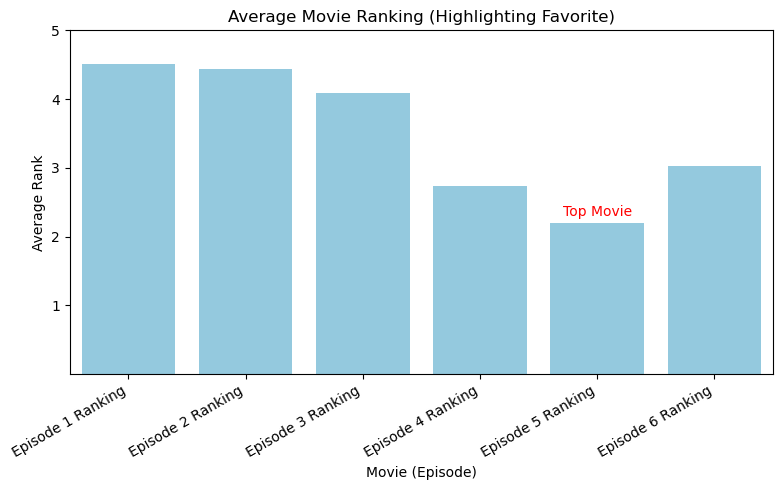

In [22]:
best_score = avg_ranks.min()
best_movie = avg_ranks[avg_ranks == best_score].index[0]

plt.figure(figsize=(8,5))
sns.barplot(x=avg_ranks.index, y=avg_ranks.values, color="skyblue")

plt.title("Average Movie Ranking (Highlighting Favorite)")
plt.xlabel("Movie (Episode)")
plt.ylabel("Average Rank")

plt.text(
    x=list(avg_ranks.index).index(best_movie),
    y=best_score + 0.1,
    s="Top Movie",
    color='red',
    ha='center'
)

plt.xticks(rotation=30, ha='right')

plt.yticks(range(1, int(max(avg_ranks.values)) + 2))

plt.tight_layout()
plt.show()

Now this visualization, I plotted the average rankings which I did earlier. The lower the ranking, the better in this since 1 would typically be the best. It shows that Episode 5: The Empire Strikes Back is the highest ranked movie out of the surveyors with an average rank of about 2. Episode 4 and Episode 6 make up the second and third best ranking. I added an annotation that shows that Episode 5 is the top ranked movie. 

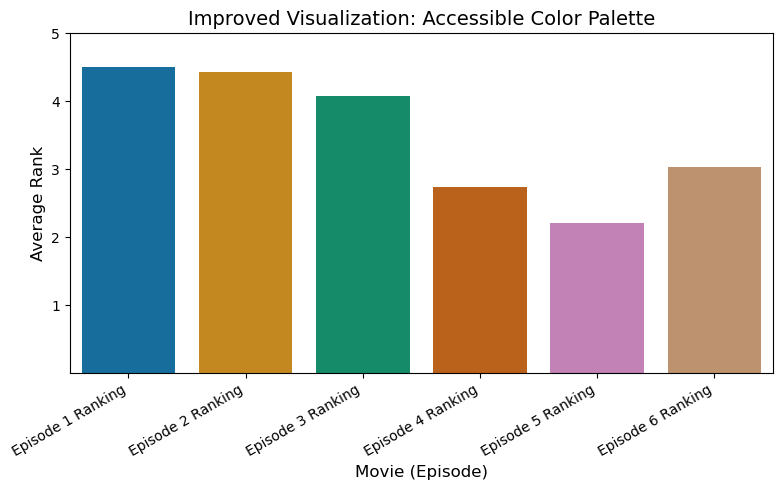

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=avg_ranks.index,
    y=avg_ranks.values,
    hue=avg_ranks.index,    
    palette="colorblind",             
)

plt.title("Improved Visualization: Accessible Color Palette", fontsize=14)
plt.xlabel("Movie (Episode)", fontsize=12)
plt.ylabel("Average Rank", fontsize=12)

plt.xticks(rotation=30, ha="right")  
plt.yticks(range(1, int(max(avg_ranks.values)) + 2)) 
plt.tight_layout()
plt.show()

I improved the previous chart by adding a colorblind palette to the chart so it is not all one color. This can help those who might be colorblind to easily distinguish the bars on the chart. I also added the ticks to make the x-axis more readable. 